In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering,KMeans,DBSCAN
import warnings
warnings.filterwarnings('ignore')

In [2]:
wine=pd.read_csv('wine.csv')
wine

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### EDA:

In [3]:
wine.shape

(178, 14)

In [4]:
wine.isnull().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

#### wine data contains no null values

In [5]:
wine.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

#### All features are of numerical datatypes

In [6]:
wine.describe(include='all')

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [7]:
wine['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

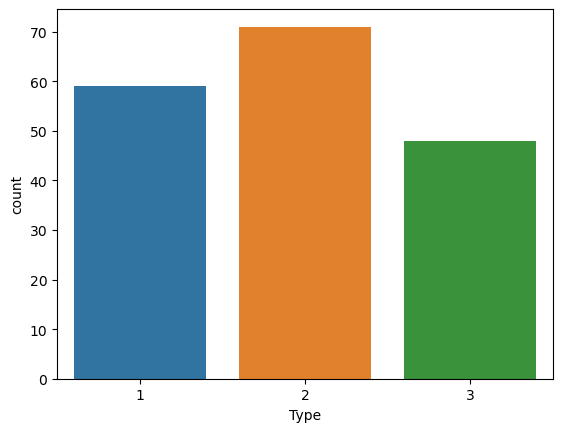

In [8]:
sns.countplot(x=wine['Type'])
plt.show()

#### Pre defined number of clusters in orginal data is 3

In [9]:
wine=wine.iloc[:,1:]
wine

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


### Scaling the data

In [10]:
scaled=MinMaxScaler()
scaled=scaled.fit_transform(wine)
wine_scaled=pd.DataFrame(scaled,columns=wine.columns)
wine_scaled

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.705263,0.970356,0.582888,0.510309,0.271739,0.241379,0.056962,0.735849,0.205047,0.547782,0.130081,0.172161,0.329529
174,0.623684,0.626482,0.598930,0.639175,0.347826,0.282759,0.086498,0.566038,0.315457,0.513652,0.178862,0.106227,0.336662
175,0.589474,0.699605,0.481283,0.484536,0.543478,0.210345,0.073840,0.566038,0.296530,0.761092,0.089431,0.106227,0.397290
176,0.563158,0.365613,0.540107,0.484536,0.543478,0.231034,0.071730,0.754717,0.331230,0.684300,0.097561,0.128205,0.400856


### PCA :

In [11]:
pca_decomposition=PCA()
wine_transformed=pca_decomposition.fit_transform(wine_scaled)
wine_transformed

array([[-0.70633576, -0.25319275,  0.02409269, ...,  0.04971144,
        -0.02001158, -0.00872296],
       [-0.4849768 , -0.00882289, -0.28048205, ...,  0.07415784,
        -0.05083753, -0.00524944],
       [-0.52117227, -0.18918722,  0.19621674, ...,  0.0121311 ,
        -0.10418449, -0.02316441],
       ...,
       [ 0.62631289, -0.54685701, -0.03049476, ...,  0.13116697,
         0.11160576,  0.0389133 ],
       [ 0.5729911 , -0.42551609, -0.09453672, ...,  0.03027458,
         0.05732893,  0.01103053],
       [ 0.701764  , -0.51350498,  0.29390996, ..., -0.02784028,
         0.01873501, -0.06648261]])

In [12]:
pca_explained_ratio=pca_decomposition.explained_variance_ratio_
pca_explained_ratio

array([0.40749485, 0.18970352, 0.08561671, 0.07426678, 0.05565301,
       0.04658837, 0.03663929, 0.02408789, 0.02274371, 0.02250965,
       0.01381292, 0.01273236, 0.00815095])

In [13]:
var=np.cumsum(np.round(a=pca_explained_ratio,decimals=4)*100)
var

array([ 40.75,  59.72,  68.28,  75.71,  81.28,  85.94,  89.6 ,  92.01,
        94.28,  96.53,  97.91,  99.18, 100.  ])

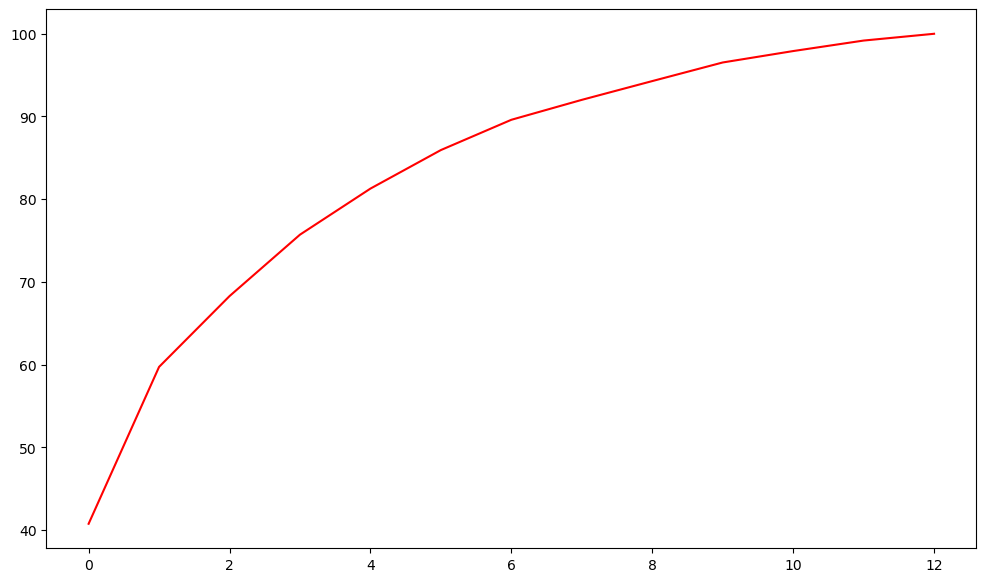

In [14]:
plt.figure(figsize=(12,7))
plt.plot(var,color='red')
plt.show()

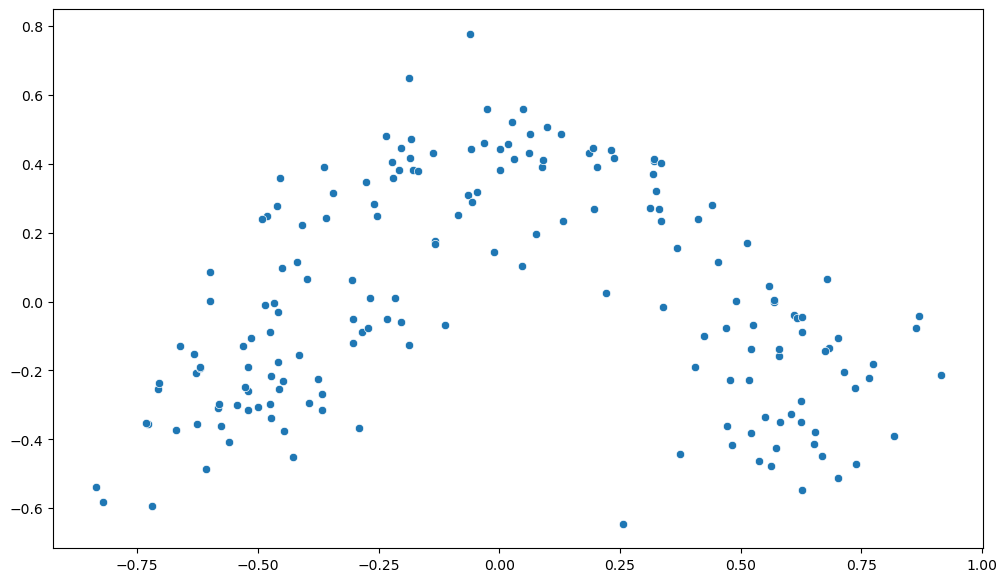

In [15]:
plt.figure(figsize=(12,7))
x=wine_transformed[:,0]
y=wine_transformed[:,1]
z=wine_transformed[:,2]
sns.scatterplot(x=x,y=y)
plt.show()

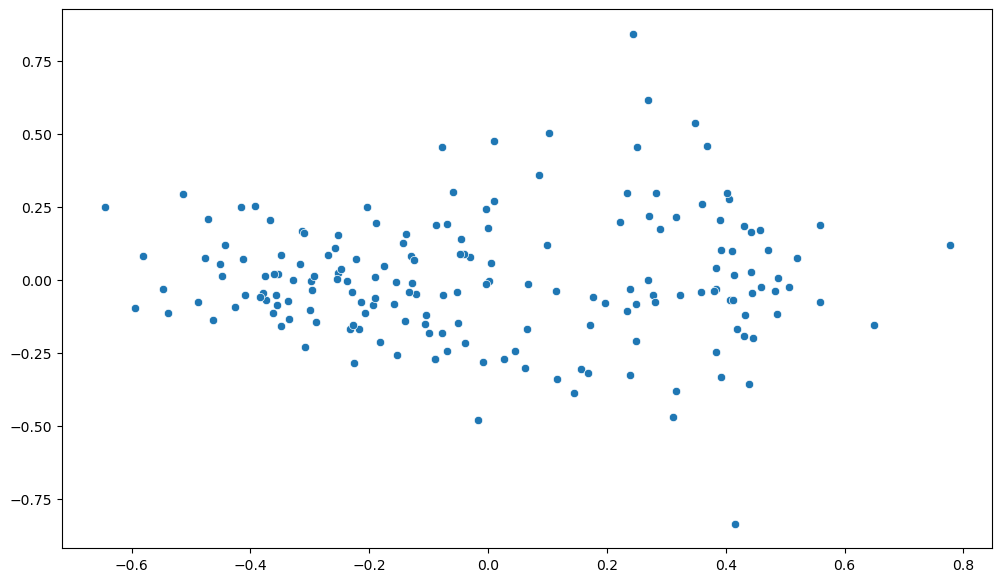

In [16]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=y,y=z)
plt.show()

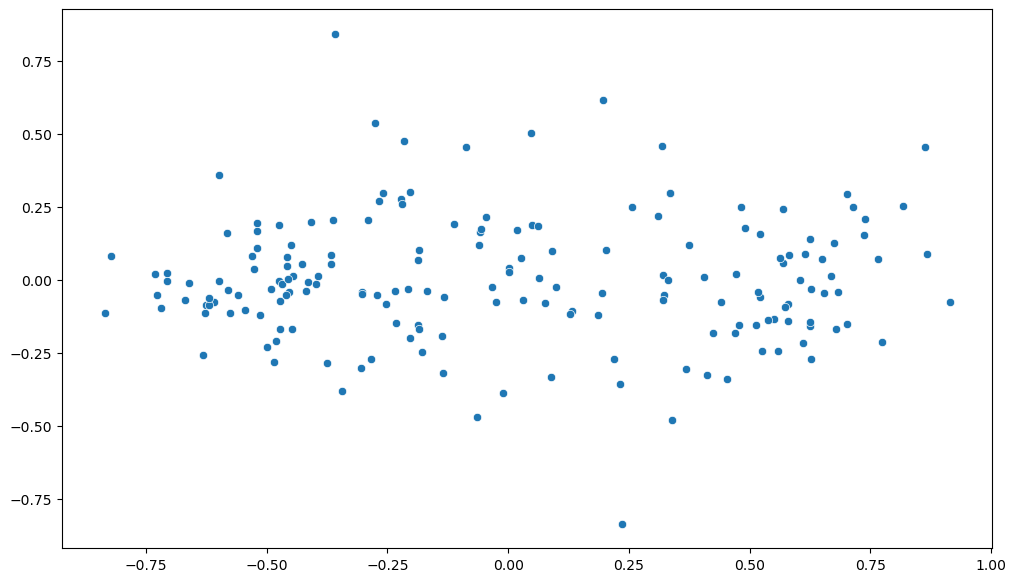

In [17]:
plt.figure(figsize=(12,7))
sns.scatterplot(x=x,y=z)
plt.show()

In [18]:
!pip install seaborn --upgrade

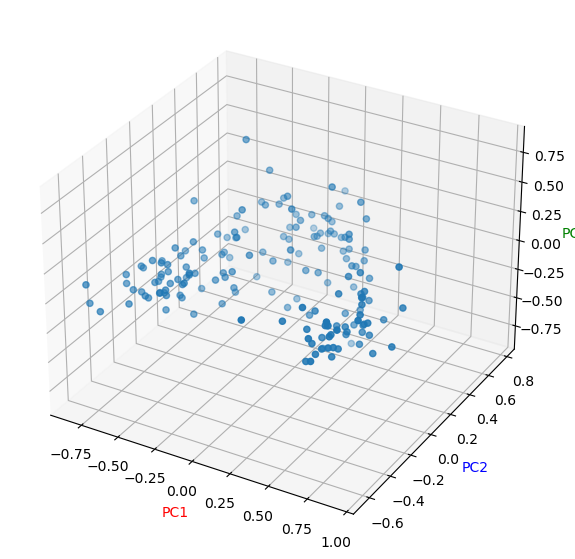

In [19]:
plt.figure(figsize=(12,7))
axes=plt.axes(projection='3d')
axes.scatter3D(x,y,z)
axes.set_xlabel('PC1',color='red')
axes.set_ylabel('PC2',color='blue')
axes.set_zlabel('PC3',color='green')
plt.show()

In [20]:
wine_transformed_df=pd.DataFrame(wine_transformed[0:,:3],columns=['PC1','PC2','PC3'])
wine_transformed_df
#Took 3 columns of pc values for further processes

,PC1,PC2,PC3
0,-0.706336,-0.253193,0.024093
1,-0.484977,-0.008823,-0.280482
2,-0.521172,-0.189187,0.196217
3,-0.821644,-0.580906,0.081110
4,-0.202546,-0.059467,0.300240
...,...,...,...
173,0.739510,-0.471901,0.209360
174,0.581781,-0.348366,0.083590
175,0.626313,-0.546857,-0.030495
176,0.572991,-0.425516,-0.094537


### CLUSTERING
### 1.Hierarchical Clustering

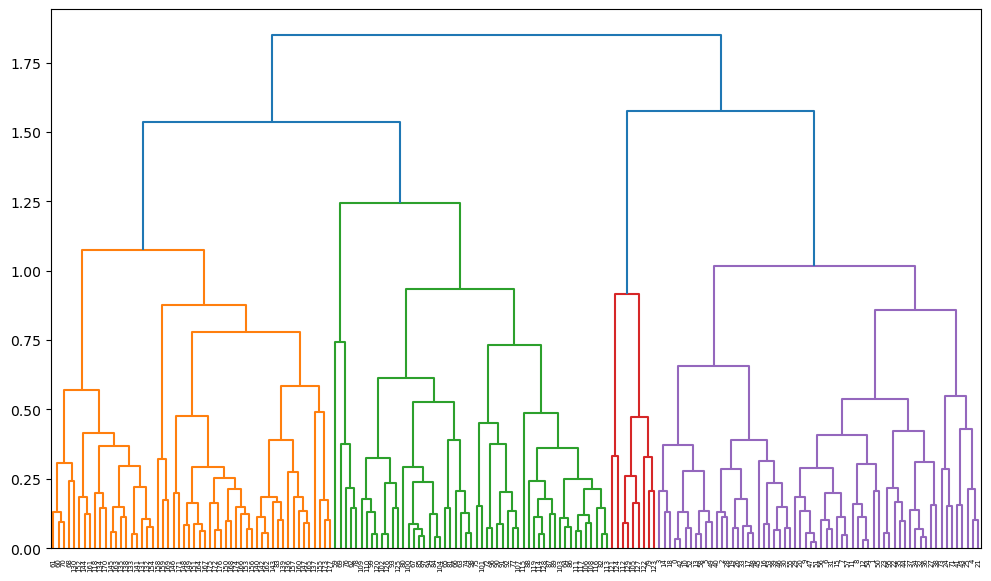

In [21]:
plt.figure(figsize=(12,7))
dendrogram=sch.dendrogram(sch.linkage(wine_transformed_df,method='complete'))

In [22]:
hc=AgglomerativeClustering(n_clusters=4,metric='euclidean',linkage='ward')
hc_clusters=hc.fit_predict(wine_transformed_df)
hc_clusters_df=pd.DataFrame(hc_clusters,columns=['clusters'])
hc_clusters_df

,clusters
0,0
1,0
2,0
3,0
4,3
...,...
173,1
174,1
175,1
176,1


In [23]:
hc_clusters_df['clusters'].value_counts()

0    61
2    54
1    49
3    14
Name: clusters, dtype: int64

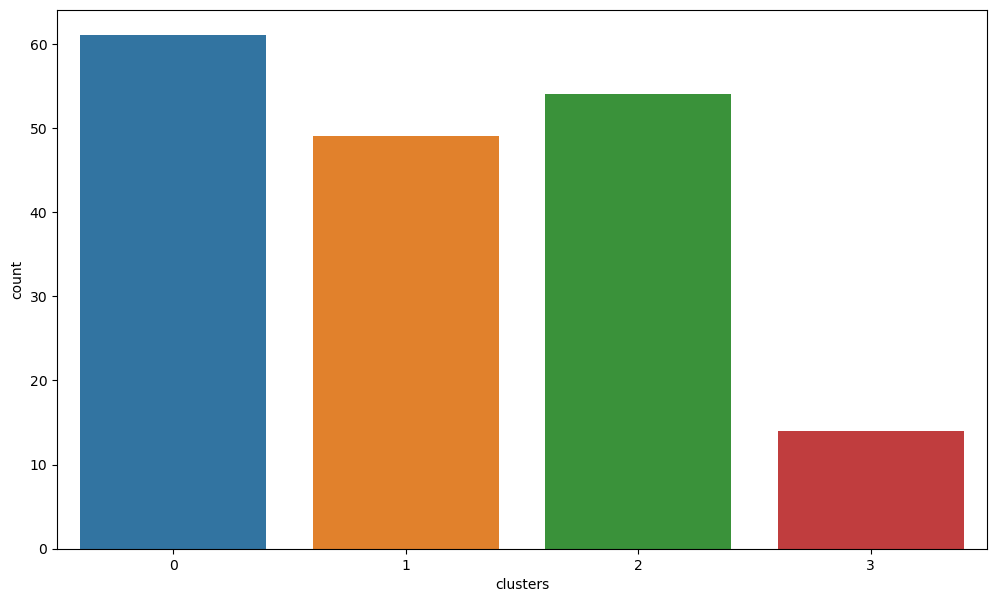

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(x=hc_clusters_df['clusters'])
plt.show()

In [25]:
wine1=wine.copy()
wine1['hc_clusters']=hc_clusters_df
wine1

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,hc_clusters
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,1
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,1
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,1
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,1


### 2.KMeans

### Elbow method

In [26]:
wc=[]
for i in range(1,11):
    model_kmean=KMeans(n_clusters=i,random_state=99)
    model_kmean1=model_kmean.fit(wine_transformed_df)
    wc.append(model_kmean1.inertia_)
wc

[65.27680504589118,
 34.29463958796957,
 18.938260830466444,
 15.666001148083447,
 13.51244098884538,
 11.679973125456955,
 10.428910584241319,
 9.438843852340177,
 8.856344130551042,
 8.098087266300569]

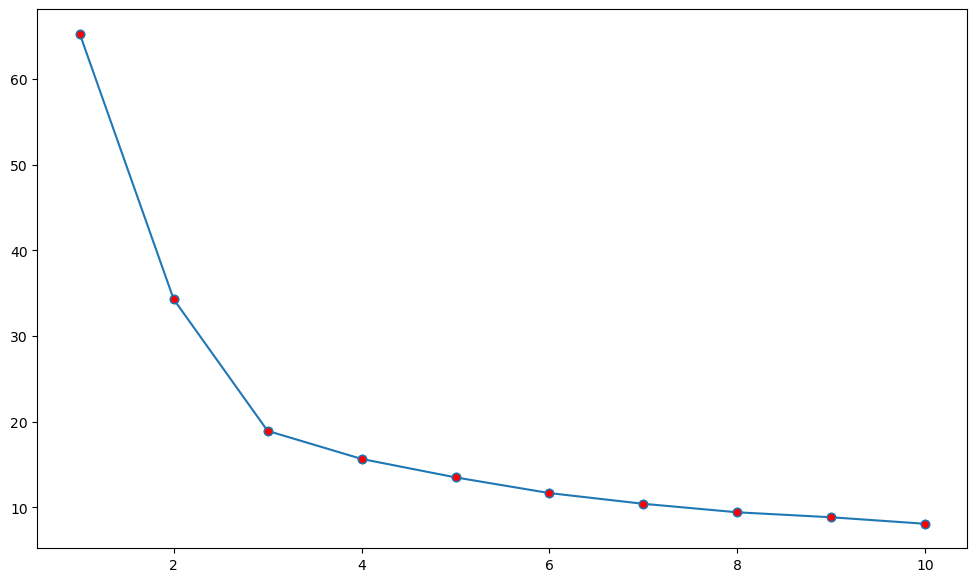

In [27]:
plt.figure(figsize=(12,7))
plt.plot(range(1,11),wc,marker='o',markerfacecolor='red')
plt.scatter(range(1,11),wc)
plt.show()

#### Above graph shows elbow formation is at point 3,so ideal number of cluster for K-Means is 3

In [28]:
kmean_cluster=KMeans(n_clusters=3,random_state=12)
kmean_cluster=kmean_cluster.fit_predict(wine_transformed_df)
kmean_cluster_df=pd.DataFrame(kmean_cluster,columns=['clusters'])
kmean_cluster_df

,clusters
0,0
1,0
2,0
3,0
4,0
...,...
173,2
174,2
175,2
176,2


In [29]:
kmean_cluster_df['clusters'].value_counts()

0    65
1    62
2    51
Name: clusters, dtype: int64

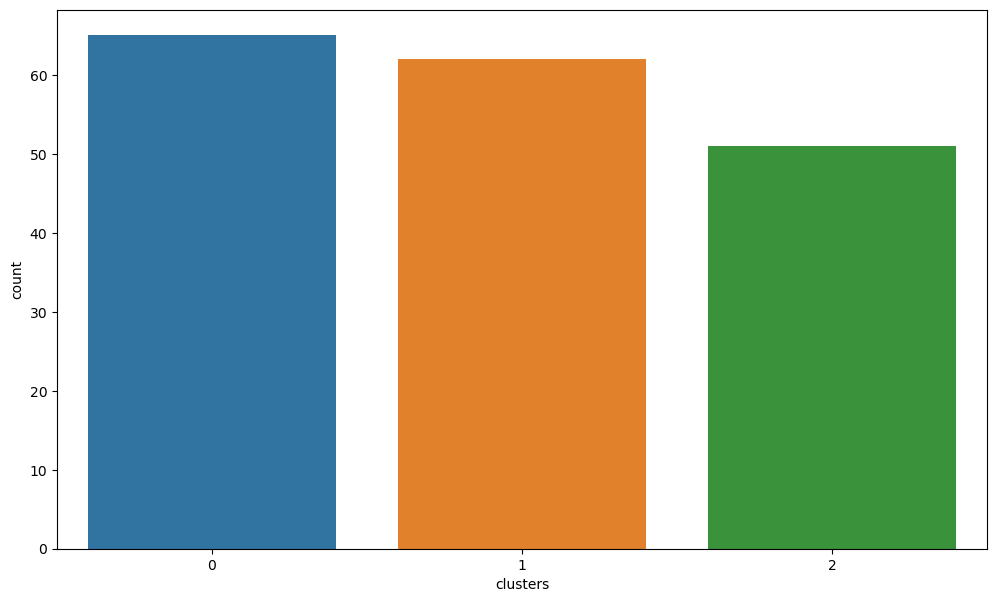

In [30]:
plt.figure(figsize=(12,7))
sns.countplot(x=kmean_cluster_df['clusters'])
plt.show()

In [31]:
wine2=wine.copy()
wine2['kmean_cluster']=kmean_cluster_df
wine2

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,kmean_cluster
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


### We found that in hierarchical clustering ideal number of clusters is 4
### But in both orginal dataset and K-Mean clustering,we got number of clusters as 3